In [2]:
import pandas as pd

# Load actual and predicted values
true_df = pd.read_csv("input_test_data_original.csv")        # must contain RiskScore column
pred_df = pd.read_csv("output_predicted.csv")           # must contain predicted RiskScore column

# Example column names (adjust to your file)
#true_df.head()
pred_df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,predicted_risk_score
0,32,29035,553,Employed,Bachelor,14,23553,36,Married,3,...,12,1685,310,36034,35182,2419.583333,0.738819,6,7703,53.000
1,35,71250,459,Employed,Master,10,12747,60,Married,1,...,13,2927,325,74308,15528,5937.500000,0.748907,6,58780,46.840
2,35,60344,476,Employed,High School,12,18795,60,Married,0,...,17,569,2589,80786,4119,5028.666667,0.800647,7,76667,53.066
3,30,70440,595,Employed,Bachelor,6,12036,36,Married,1,...,16,1113,740,31127,13498,5870.000000,0.885370,7,17629,43.942
4,45,56652,542,Self-Employed,High School,20,28466,48,Married,1,...,8,1932,548,64385,6193,4721.000000,0.909206,3,58192,53.694


In [3]:
true_df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,RiskScore
0,32,29035,553,Employed,Bachelor,14,23553,36,Married,3,...,12,1685,310,36034,35182,2419.583333,0.738819,6,7703,53.0
1,35,71250,459,Employed,Master,10,12747,60,Married,1,...,13,2927,325,74308,15528,5937.500000,0.748907,6,58780,54.0
2,35,60344,476,Employed,High School,12,18795,60,Married,0,...,17,569,2589,80786,4119,5028.666667,0.800647,7,76667,55.0
3,30,70440,595,Employed,Bachelor,6,12036,36,Married,1,...,16,1113,740,31127,13498,5870.000000,0.885370,7,17629,40.8
4,45,56652,542,Self-Employed,High School,20,28466,48,Married,1,...,8,1932,548,64385,6193,4721.000000,0.909206,3,58192,53.0


In [4]:
df = pd.concat([true_df["RiskScore"], pred_df["predicted_risk_score"]], axis=1)
df.columns = ["RiskScore_true", "RiskScore_pred"]


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_true = df["RiskScore_true"]
y_pred = df["RiskScore_pred"]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


RMSE: 3.035
MAE: 1.925
R²: 0.846


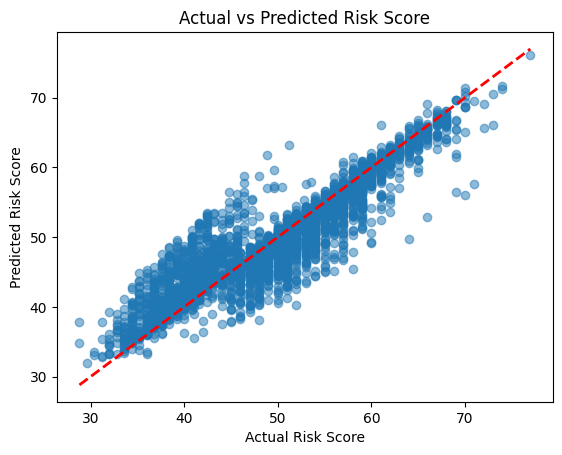

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--', lw=2)  # ideal line
plt.xlabel("Actual Risk Score")
plt.ylabel("Predicted Risk Score")
plt.title("Actual vs Predicted Risk Score")
plt.show()


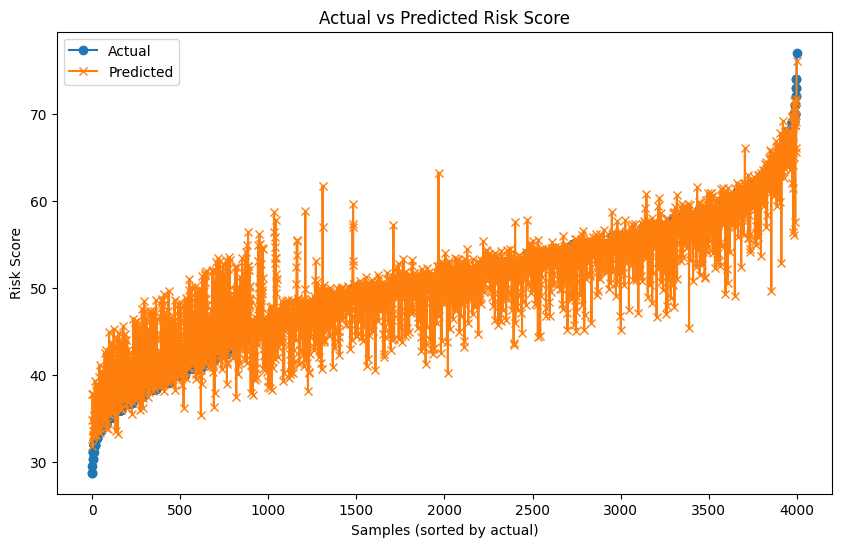

In [7]:
import numpy as np

sorted_idx = np.argsort(y_true)
plt.figure(figsize=(10,6))
plt.plot(np.array(y_true)[sorted_idx], label="Actual", marker='o')
plt.plot(np.array(y_pred)[sorted_idx], label="Predicted", marker='x')
plt.xlabel("Samples (sorted by actual)")
plt.ylabel("Risk Score")
plt.title("Actual vs Predicted Risk Score")
plt.legend()
plt.show()


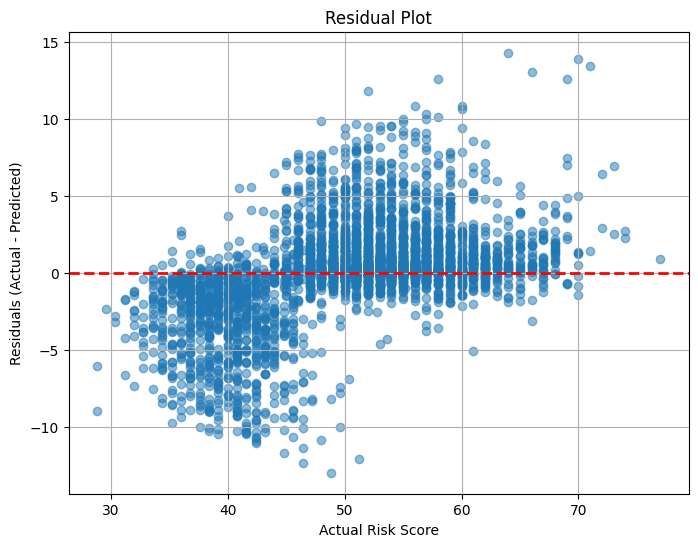

In [8]:
residuals = y_true - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_true, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Actual Risk Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()
